<a href="https://colab.research.google.com/github/MagomedNalgiev/Google-Colab/blob/main/ML_learn_CarPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

In [8]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
           'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
           'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
           'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
           'city-mpg', 'highway-mpg', 'price']
data = pd.read_csv(url, names=columns)

In [10]:
data.replace('?', np.nan, inplace=True)
data.dropna(subset=['price'], inplace=True)

In [12]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [14]:
data['price'] = data['price'].astype(float)
data['horsepower'] = data['horsepower'].astype(float)
data['peak-rpm'] = data['peak-rpm'].astype(float)

In [16]:
data = pd.get_dummies(data, drop_first=True)

In [18]:
X = data.drop(['price'], axis=1)
y = data['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [24]:
params = {
    'objective': 'reg:squarederror',  # задача регрессии
    'max_depth': 4,  # максимальная глубина дерева
    'eta': 0.1,  # шаг обучения
    'subsample': 0.8,  # доля выборки для создания дерева
    'colsample_bytree': 0.8  # доля признаков для создания дерева
}

In [26]:
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

In [28]:
y_pred = bst.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [30]:
print(f"RMSE: {rmse:.2f}")

RMSE: 2402.08


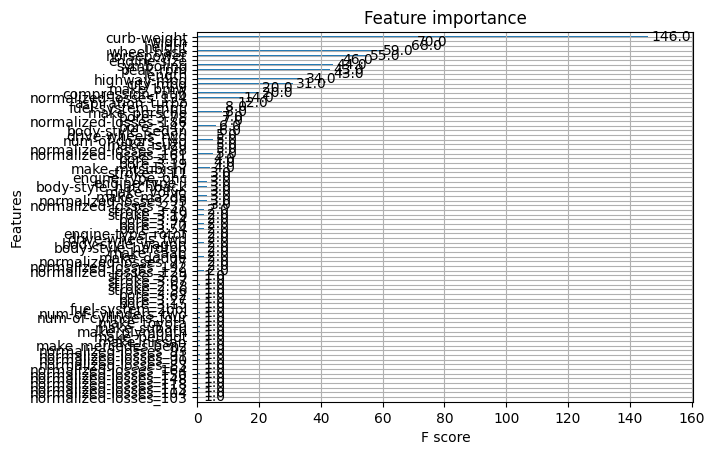

In [31]:
xgb.plot_importance(bst)
plt.show()